In [10]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import avg, min
spark = SparkSession.builder.getOrCreate()

In [11]:
g = spark.read.format('csv').option('header','true').load(r'C:\Users\s564837\Downloads\flights.csv')


In [12]:
import pandas as pd
import matplotlib.pyplot as plt


In [14]:
# Goal 1:-Calculate the average fare for each airline
average_fare_by_airline =g.groupBy("carrier").agg(avg("air_time").alias("average_fare"))


In [18]:
# Convert to Pandas DataFrame for visualization
average_fare_pd["carrier"] = average_fare_pd["carrier"].astype(str)

In [19]:
# Define colors for each airline
colors = ['yellow', 'green', 'red', 'blue', 'orange']

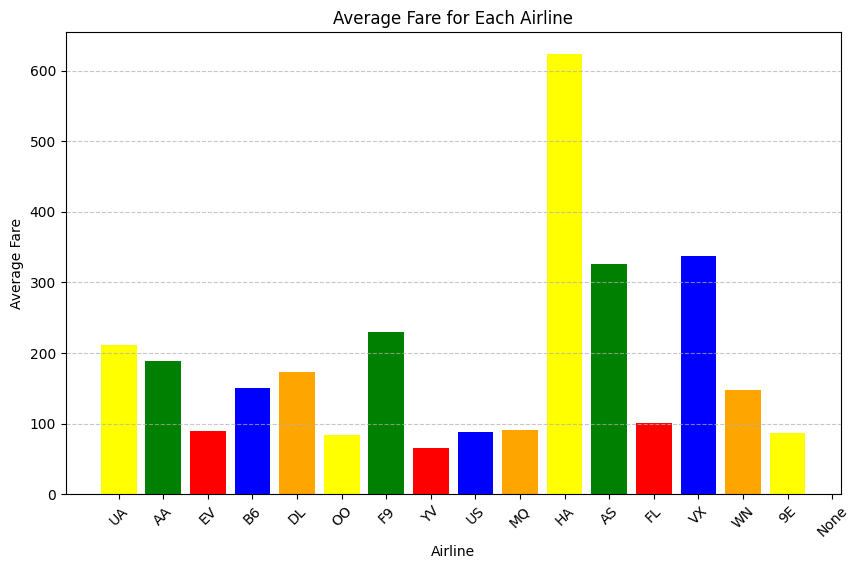

In [20]:
# Plotting average fare for each airline with different colors
plt.figure(figsize=(10, 6))
plt.bar(average_fare_pd["carrier"], average_fare_pd["average_fare"], color=colors)
plt.xlabel("Airline")
plt.ylabel("Average Fare")
plt.title("Average Fare for Each Airline")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
#goal 2:- Cheapest Airlanes and fairs

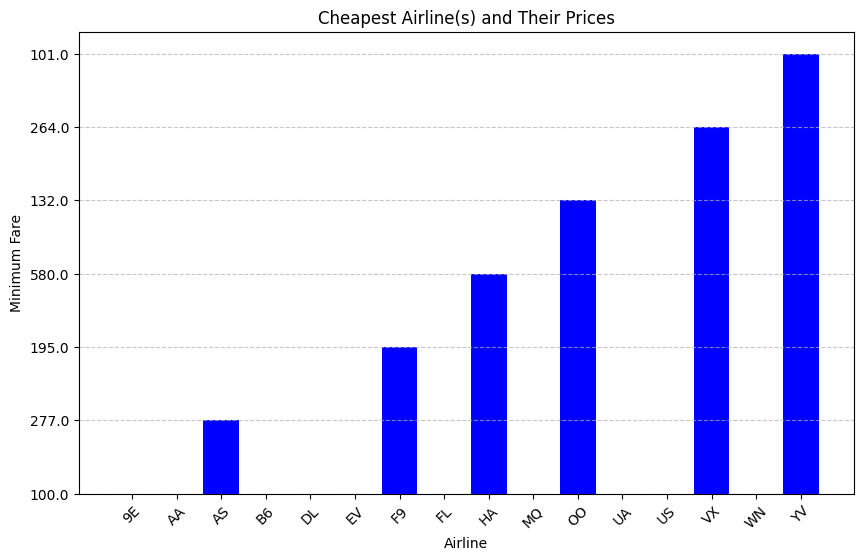

In [34]:
min_fare = g.groupBy("carrier").agg(min("air_time").alias("min_fare"))
min_fare = min_fare.withColumnRenamed("carrier", "min_carrier")  # Rename carrier column in min_fare DataFrame

# Join min_fare DataFrame with flights DataFrame
cheapest_airlines = min_fare.join(g, (min_fare["min_carrier"] == g["carrier"]) & (min_fare["min_fare"] == g["air_time"]))

# Convert to Pandas DataFrame for visualization
cheapest_airlines_pd = cheapest_airlines.select("min_carrier", "min_fare").distinct().toPandas()

# Plotting cheapest airline(s) and their prices
plt.figure(figsize=(10, 6))
plt.bar(cheapest_airlines_pd["min_carrier"], cheapest_airlines_pd["min_fare"], color='blue')
plt.xlabel("Airline")
plt.ylabel("Minimum Fare")
plt.title("Cheapest Airline(s) and Their Prices")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

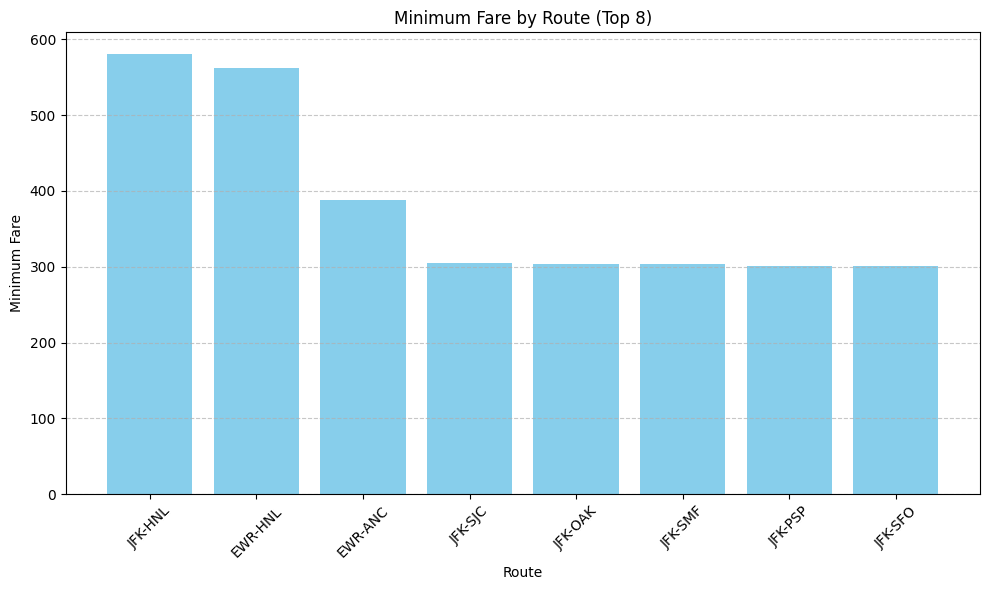

In [46]:
# Goal 3:- Min fare by any 8 routes Convert 'min_fare' column to numeric type
top_routes = min_fare_by_route_pd.sort_values(by="min_fare", ascending=False).head(8)

# Plotting minimum fare by route using a bar chart for top 8 routes
plt.figure(figsize=(10, 6))
plt.bar(top_routes['route'], top_routes['min_fare'], color='skyblue')
plt.xlabel("Route")
plt.ylabel("Minimum Fare")
plt.title("Minimum Fare by Route (Top 8)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [63]:
from pyspark.sql.functions import to_date, month

In [ ]:
#Goal 4 & 5 Trend of ticket purchases over time (Daily): Line chart  Trend of ticket purchases over time (Monthly): Line chart

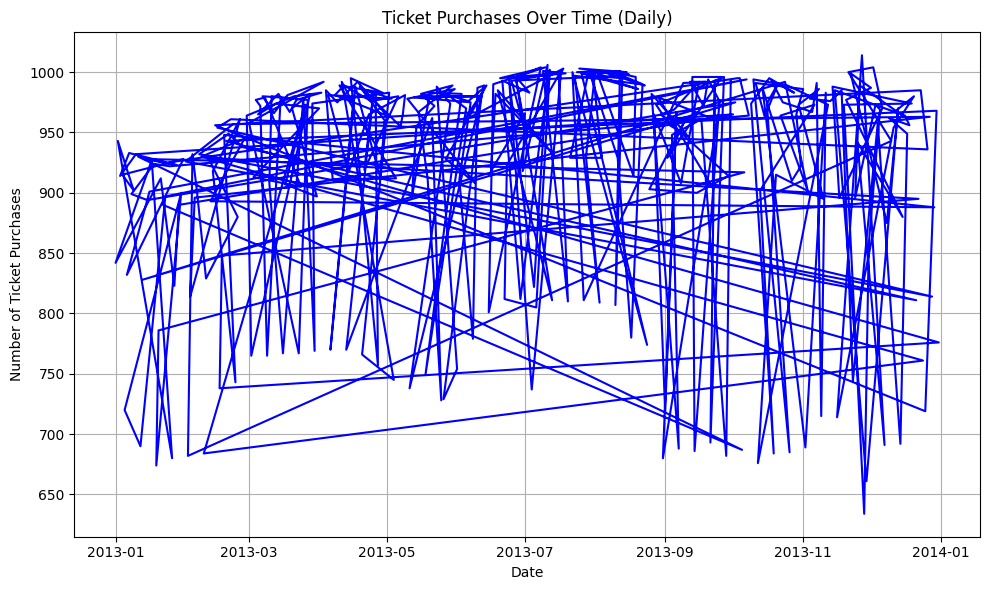

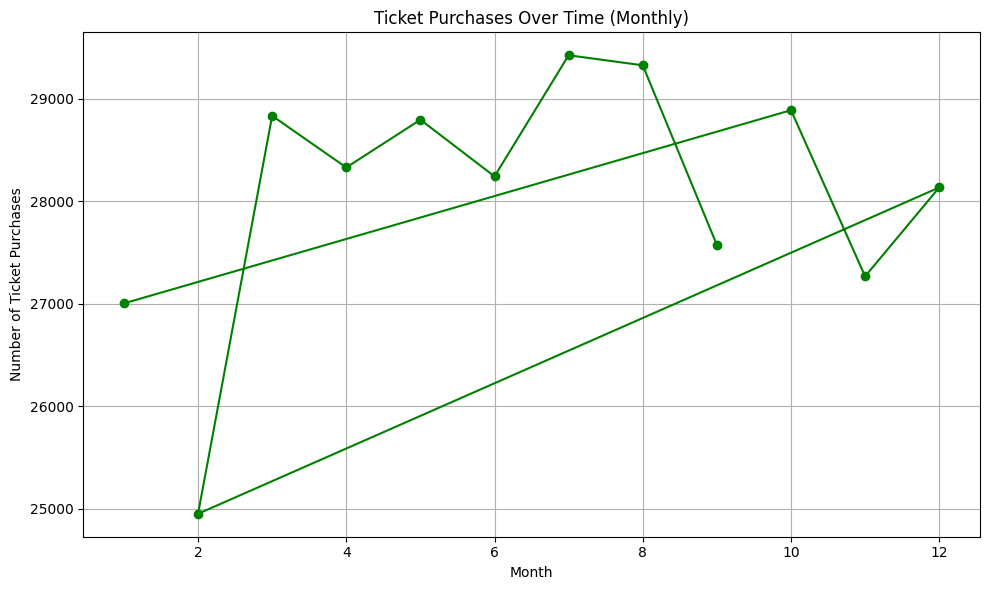

In [66]:
# Convert 'time_hour' column to datetime
# Convert 'time_hour' column to datetime
g = g.withColumn('time_hour', to_date(g['time_hour']))

# Extracting date and month from 'time_hour' column
g = g.withColumn('date', g['time_hour'])
g = g.withColumn('month', month(g['time_hour']))

# Group by date to get the number of ticket purchases for each day
ticket_purchases_by_date = g.groupBy('date').count()

# Group by month to get the number of ticket purchases for each month
ticket_purchases_by_month = g.groupBy('month').count()

# Convert to Pandas DataFrame for plotting
ticket_purchases_by_date_pd = ticket_purchases_by_date.toPandas()
ticket_purchases_by_month_pd = ticket_purchases_by_month.toPandas()

# Plotting the trend of ticket purchases over time (daily)
plt.figure(figsize=(10, 6))
plt.plot(ticket_purchases_by_date_pd['date'], ticket_purchases_by_date_pd['count'], color='blue')
plt.title('Ticket Purchases Over Time (Daily)')
plt.xlabel('Date')
plt.ylabel('Number of Ticket Purchases')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plotting the trend of ticket purchases over time (monthly)
plt.figure(figsize=(10, 6))
plt.plot(ticket_purchases_by_month_pd['month'], ticket_purchases_by_month_pd['count'], color='green', marker='o')
plt.title('Ticket Purchases Over Time (Monthly)')
plt.xlabel('Month')
plt.ylabel('Number of Ticket Purchases')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
#goal 6 -->top 5 trending airlines

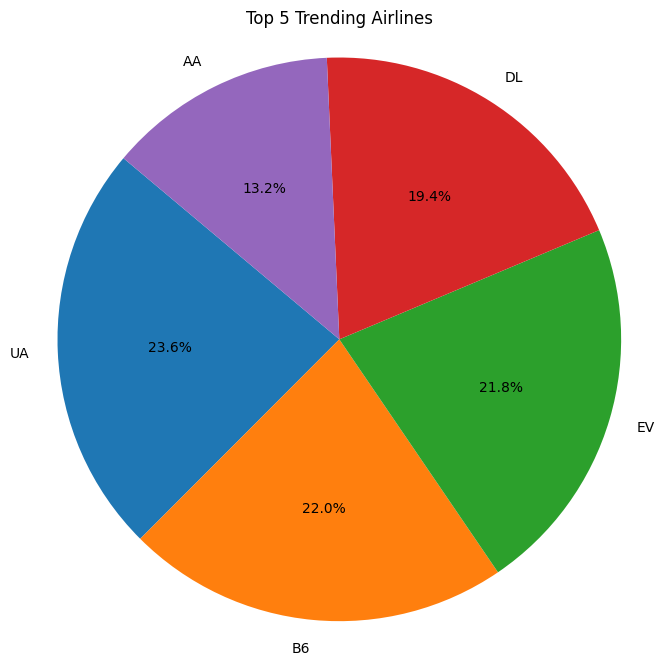

In [67]:
# Assuming 'g' is your DataFrame containing flight data

# Calculate the number of flights operated by each airline
flights_by_airline = g.groupBy('carrier').count()

# Sort the airlines by the number of flights in descending order and select the top 5 airlines
top_5_airlines = flights_by_airline.orderBy('count', ascending=False).limit(5)

# Convert DataFrame to Pandas for easier plotting
top_5_airlines_pd = top_5_airlines.toPandas()

# Plotting the distribution of flights for the top 5 airlines using a pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_5_airlines_pd['count'], labels=top_5_airlines_pd['carrier'], autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Trending Airlines')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [71]:
# Goal 7:- # Calculate the most common scheduled departure times

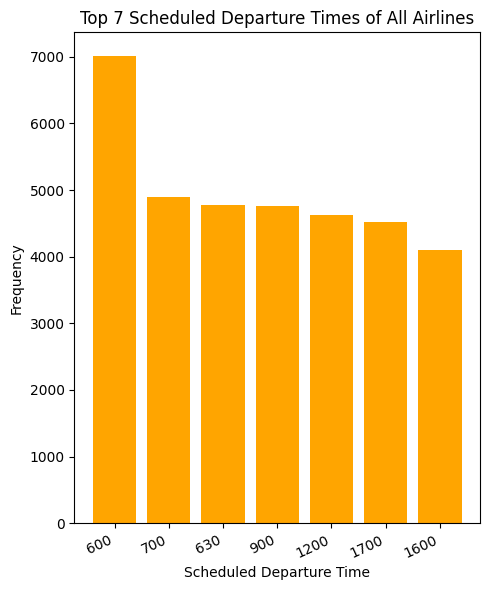

In [74]:
# Calculate the most common scheduled departure times
top_schedule_departure_times = g.groupBy('sched_dep_time').count().orderBy('count', ascending=False).limit(7)

# Convert DataFrame to Pandas for easier plotting
top_schedule_departure_times_pd = top_schedule_departure_times.toPandas()

# Plotting the top 7 scheduled departure times of all airlines using a bar chart
plt.figure(figsize=(5, 6))
plt.bar(top_schedule_departure_times_pd['sched_dep_time'], top_schedule_departure_times_pd['count'], color='orange')
plt.xlabel('Scheduled Departure Time')
plt.ylabel('Frequency')
plt.title('Top 7 Scheduled Departure Times of All Airlines')
plt.xticks(rotation=25, ha='right')
plt.tight_layout()
plt.show()